In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("C:\\CODSOFT\\TASK 3\\IRIS.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

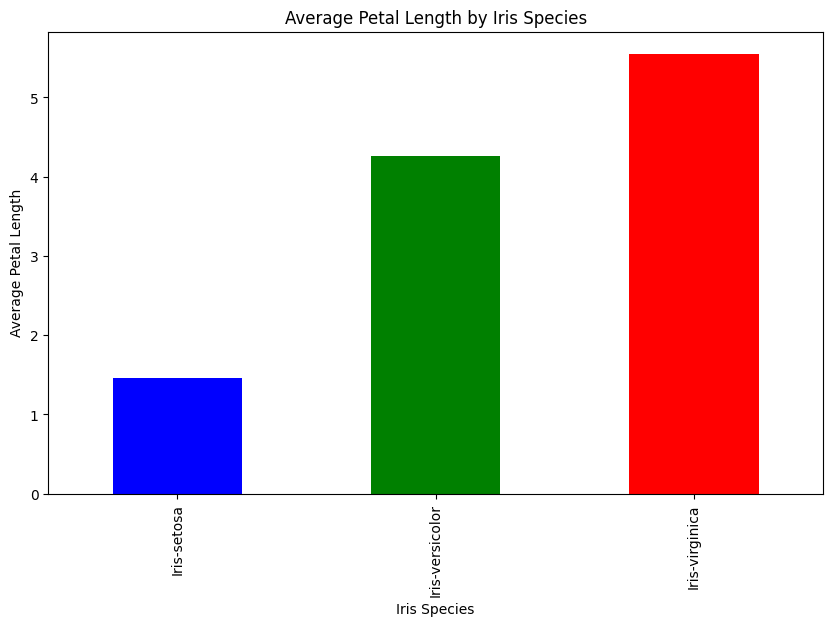

In [8]:
avg_petal_length = df.groupby('species')['petal_length'].mean()
avg_petal_length.plot(kind='bar', figsize=(10, 6), color=['blue', 'green', 'red'])
plt.xlabel('Iris Species')
plt.ylabel('Average Petal Length')
plt.title('Average Petal Length by Iris Species')
plt.show()

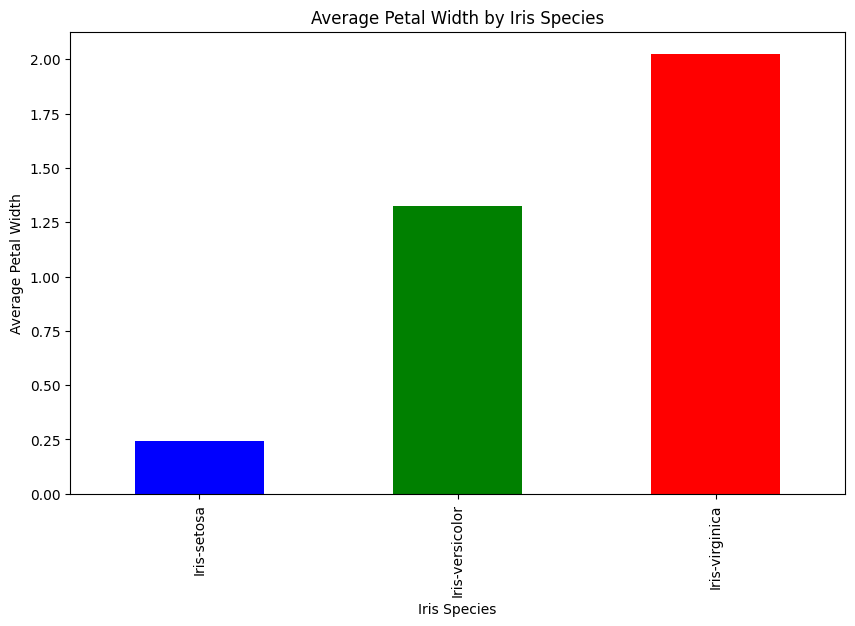

In [9]:
avg_petal_width = df.groupby('species')['petal_width'].mean()
avg_petal_width.plot(kind='bar', figsize=(10, 6), color=['blue', 'green', 'red'])
plt.xlabel('Iris Species')
plt.ylabel('Average Petal Width')
plt.title('Average Petal Width by Iris Species')
plt.show()

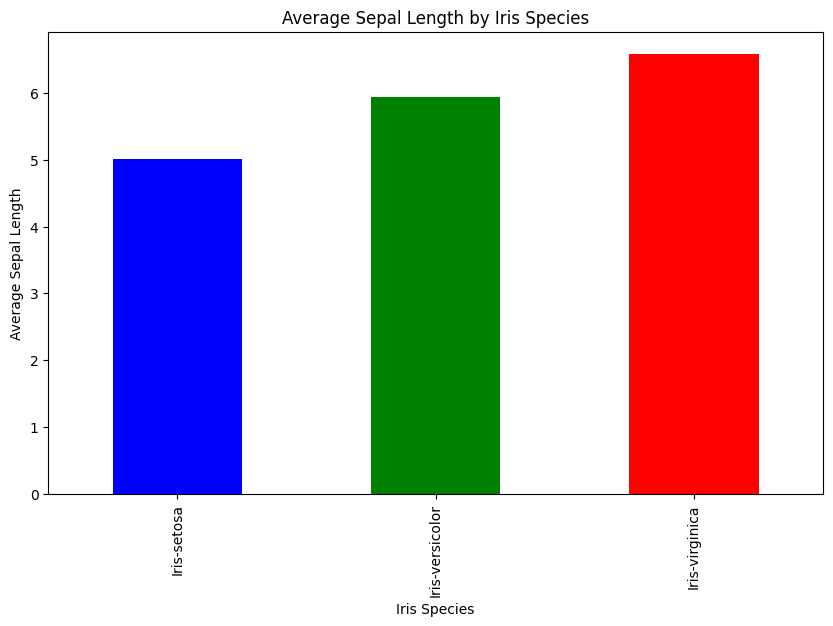

In [10]:
avg_sepal_length = df.groupby('species')['sepal_length'].mean()
avg_sepal_length.plot(kind='bar', figsize=(10, 6), color=['blue', 'green', 'red'])
plt.xlabel('Iris Species')
plt.ylabel('Average Sepal Length')
plt.title('Average Sepal Length by Iris Species')
plt.show()

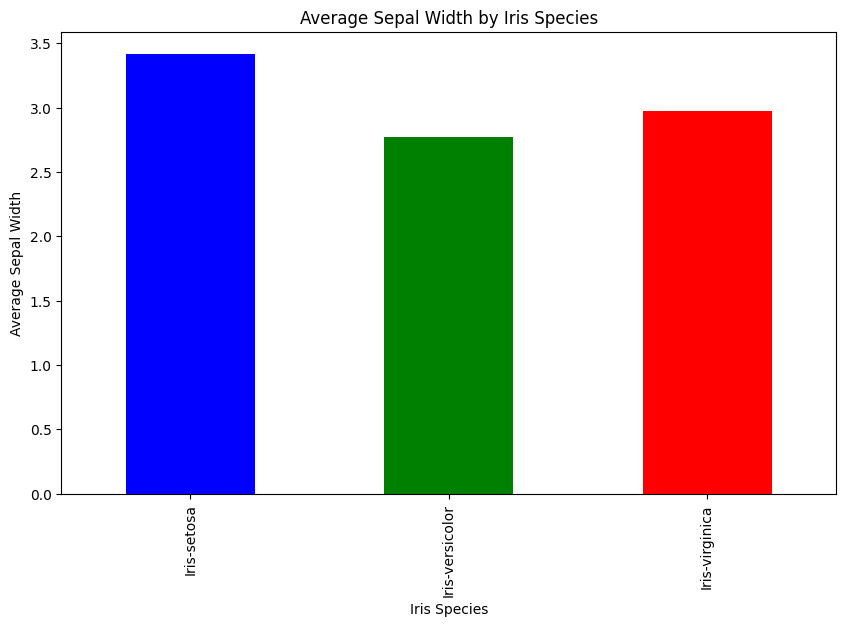

In [11]:
avg_sepal_width = df.groupby('species')['sepal_width'].mean()
avg_sepal_width.plot(kind='bar', figsize=(10, 6), color=['blue', 'green', 'red'])
plt.xlabel('Iris Species')
plt.ylabel('Average Sepal Width')
plt.title('Average Sepal Width by Iris Species')
plt.show()

In [12]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [13]:
X = df.drop('species', axis=1)
Y = df['species']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [15]:
knn_clf = KNeighborsClassifier(n_neighbors=3)

In [16]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
y_predict = knn_clf.predict(X_test)

In [18]:
y_predict

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [19]:
accuracy = accuracy_score(y_test, y_predict)
print(f"The accuracy of my model is:- {accuracy*100}%")

The accuracy of my model is:- 100.0%


In [20]:
class_report = classification_report(y_test, y_predict, target_names=le.classes_)

In [21]:
print(f"Classification report:- {class_report}")

Classification report:-                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [22]:
conf_matrix = confusion_matrix(y_test, y_predict)

In [23]:
conf_matrix

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [24]:
cv_scores = cross_val_score(knn_clf, X, Y, cv=10)

In [25]:
print(f"CV Scores: {cv_scores}")
print(f"CV Average Score: {cv_scores.mean():.2f}")

CV Scores: [1.         0.93333333 1.         0.93333333 0.86666667 1.
 0.93333333 1.         1.         1.        ]
CV Average Score: 0.97
